In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np



In [33]:
#LOAD THE DATA SETS 
df_young = pd.read_csv('dataset_young_age.csv')
df_rest = pd.read_csv('dataset_rest.csv')
print(df_young.shape)
print(df_rest.shape)


(20054, 16)
(29754, 16)


In [34]:
df_rest.head(2)

,age,number_of_dependants,income_lakhs,medical_score,insurance_plan_numerical,employment_score,smoking_score,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,gender_Male,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,annual_premium_amount
0,0.148148,0.0,0.05102,0.428571,0.0,1.0,0.0,1,0,0,1,1,0,0,0,9053
1,0.203704,0.4,0.05102,0.428571,0.0,1.0,1.0,0,1,0,0,0,1,0,0,16339


In [35]:
#prepare the data x,y for train model on rest data set
x=df_rest.drop('annual_premium_amount',axis='columns')
y=df_rest['annual_premium_amount']


In [36]:

#train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
print("Train data shapes--")
print(f"X train shape:{x_train.shape}")
print(f"y train shape:{y_train.shape}")
print("Test data shapes--")
print(f"X test shape:{x_test.shape}")
print(f"y test shape:{y_test.shape}")


Train data shapes--
X train shape:(20827, 15)
y train shape:(20827,)
Test data shapes--
X test shape:(8927, 15)
y test shape:(8927,)


In [37]:
#train a liner reg model on this data
from sklearn.linear_model import LinearRegression
model_lr_rest = LinearRegression()
model_lr_rest.fit(x_train,y_train)

test_score = model_lr_rest.score(x_test,y_test) 
train_score = model_lr_rest.score(x_train,y_train)
print(f"Train score {(train_score):2f}")
print(f"Test score {(test_score):2f}")

r2_score = model_lr_rest.score(x_test, y_test)
print(f"R2 score:{(r2_score):2f}")

Train score 0.950716
Test score 0.950245
R2 score:0.950245


In [38]:
y_pred  = model_lr_rest.predict(x_test)
err = y_test -y_pred
percentage_err =(err/y_test)*100

# percentage_err =err*100/y_test

<Axes: xlabel='percentage_difference', ylabel='Count'>

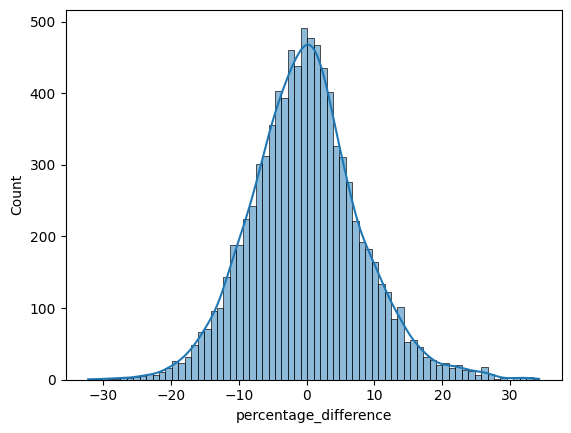

In [39]:
result_map ={
    'actual_y':y_test,
    'predicted_y':y_pred,
    'percentage_difference':percentage_err
}
result_df = pd.DataFrame(result_map)
#plot  %error histogram
sns.histplot(result_df['percentage_difference'],kde=True)
 

#ERR minimize to -127% -50% to -30% - +30%

In [40]:
#count err >abs(10)
count_10_err=0
count_20_err =0 
for per_err in percentage_err:
    if per_err >10 or per_err<-10: 
        count_10_err+=1
    if per_err >20 or per_err <-20:
        count_20_err+=1

print(f'Total Test data : {y_test.size}')
print(f'Extreme error count(>10%):{count_10_err}')
print(f"Extreme err >abs(20)%:{count_20_err}")
print(f"Almost {(count_10_err/y_test.size *100):1f}% of test data Have >+-10% err")
print(f"Almost {(count_20_err/y_test.size *100):1f}% of test data Have >+20% err")
print(percentage_err.describe())



Total Test data : 8927
Extreme error count(>10%):1805
Extreme err >abs(20)%:191
Almost 20.219559% of test data Have >+-10% err
Almost 2.139577% of test data Have >+20% err
count    8927.000000
mean       -0.165981
std         8.076256
min       -32.243593
25%        -5.366181
50%        -0.295593
75%         4.558609
max        34.291234
Name: annual_premium_amount, dtype: float64


Training of the model on young data set

In [41]:
#lets work on young data set
x = df_young.drop('annual_premium_amount',axis='columns')
y = df_young['annual_premium_amount']

#train and test split
x_train,x_test,y_train,y_test = train_test_split(x, y,
    test_size=0.3,
    random_state=42
)
print("Train data shapes--")
print(f"X train shape:{x_train.shape}")
print(f"y train shape:{y_train.shape}")
print("Test data shapes--")
print(f"X test shape:{x_test.shape}")
print(f"y test shape:{y_test.shape}")


Train data shapes--
X train shape:(14037, 15)
y train shape:(14037,)
Test data shapes--
X test shape:(6017, 15)
y test shape:(6017,)


In [42]:
print(x_train.isnull().sum())
print(y_train.isnull().sum())

age                         0
number_of_dependants        0
income_lakhs                0
medical_score               0
insurance_plan_numerical    0
employment_score            0
smoking_score               0
region_Northwest            0
region_Southeast            0
region_Southwest            0
marital_status_Unmarried    0
gender_Male                 0
bmi_category_Obesity        0
bmi_category_Overweight     0
bmi_category_Underweight    0
dtype: int64
0


In [43]:
print(x_train.head())
print(y_train.head())

            age  number_of_dependants  income_lakhs  medical_score  \
19467  0.092593                   0.2      0.183673       0.428571   
11656  0.018519                   0.0      0.704082       0.428571   
3833   0.018519                   0.0      0.051020       0.428571   
11883  0.111111                   0.2      0.244898       0.000000   
11423  0.129630                   0.2      0.000000       0.000000   

       insurance_plan_numerical  employment_score  smoking_score  \
19467                       0.0               1.0            1.0   
11656                       0.5               1.0            0.0   
3833                        0.0               0.0            0.0   
11883                       0.0               0.0            0.0   
11423                       0.0               1.0            0.0   

       region_Northwest  region_Southeast  region_Southwest  \
19467                 0                 0                 1   
11656                 0                 1   

In [44]:
model_lr_young = LinearRegression()
model_lr_young.fit(x_train, y_train)

test_score = model_lr_rest.score(x_test,y_test) 
train_score = model_lr_rest.score(x_train,y_train)
print("Train score:",train_score)
print("test score:",test_score)
#poor score

Train score: -0.5662025213650916
test score: -0.6046078521641471


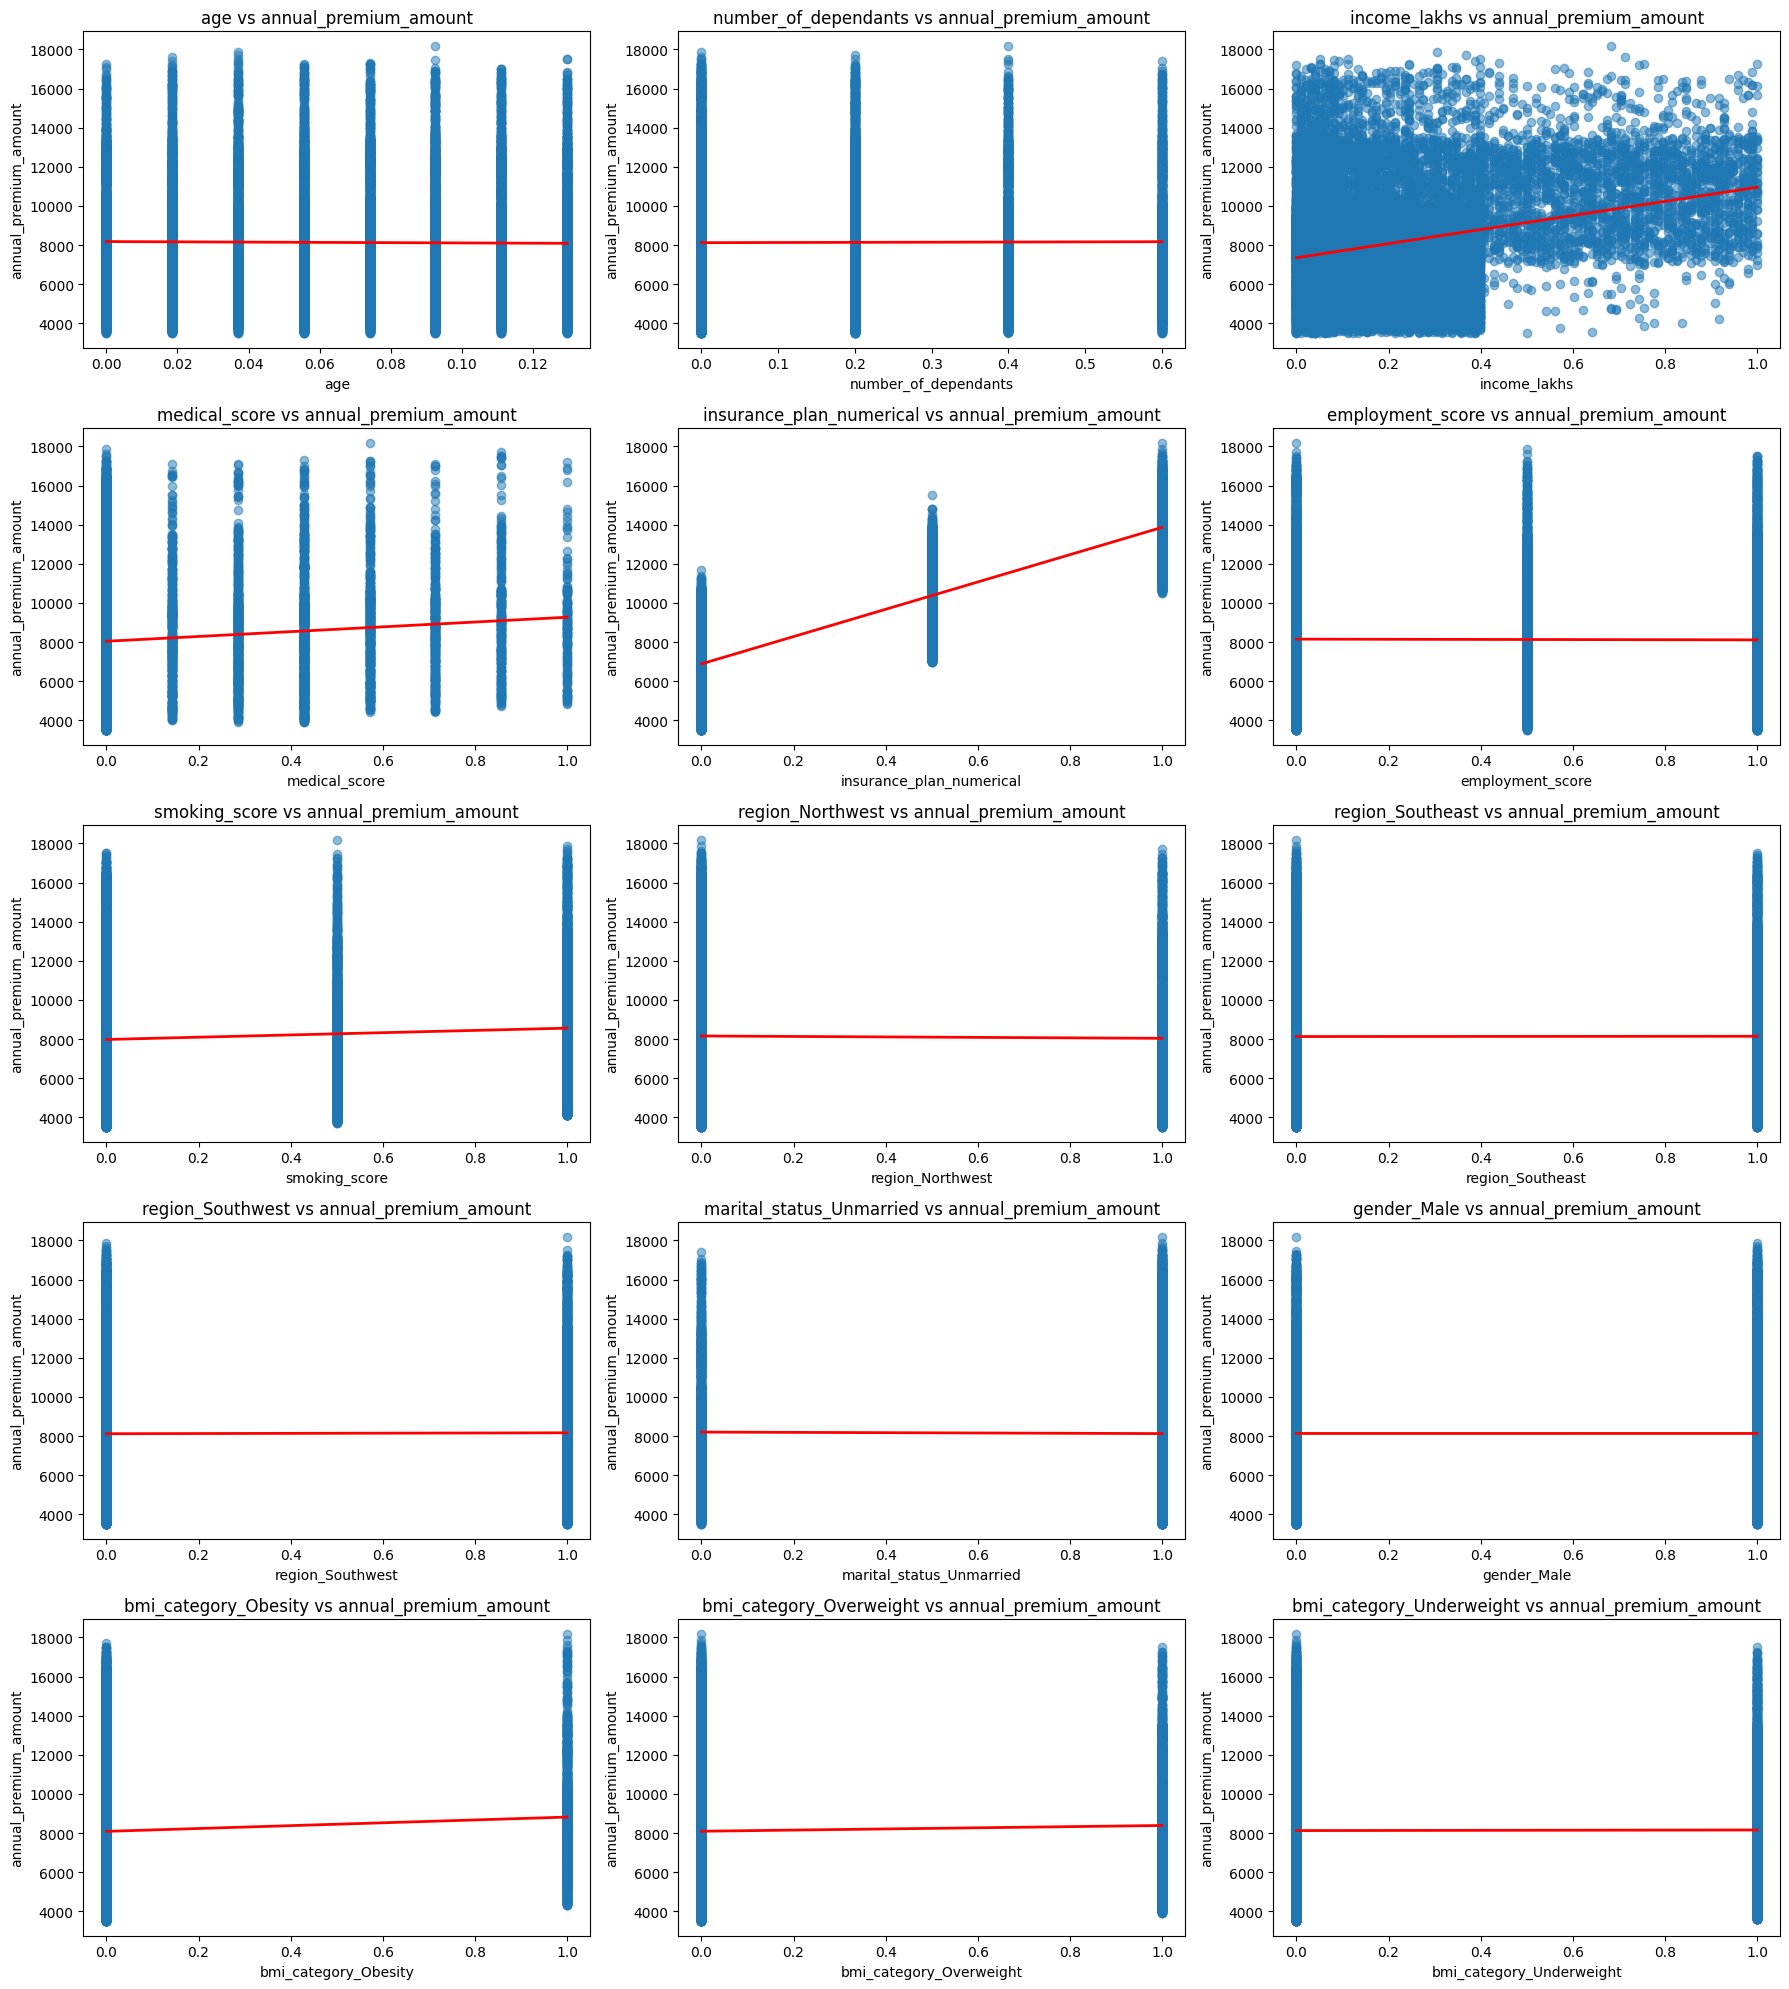

In [46]:
features = df_young.columns.drop('annual_premium_amount') 
target = 'annual_premium_amount'

n_features = len(features)
cols = 3  # number of plots per row
rows = (n_features + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
axes = axes.flatten()  # flatten to 1D array for easy iteration

for i, col in enumerate(features):
    ax = axes[i]
    ax.scatter(df_young[col], df_young[target], alpha=0.5)
    
    X_col = df_young[[col]].values
    y_col = df_young[target].values
    
    model = LinearRegression()
    model.fit(X_col, y_col)
    
    x_range = np.linspace(X_col.min(), X_col.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    
    ax.plot(x_range, y_pred, color='red', linewidth=2)
    ax.set_title(f'{col} vs {target}')
    ax.set_xlabel(col)
    ax.set_ylabel(target)

# Hide any unused subplots if number of features isn't a perfect multiple of cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


After analyzing the graphs and regression lines, it is concluded that the data does not exhibit any linear relationship or any relationship  with the target column. The scatter plots show a flat or widely spread pattern, indicating weak or no correlation. Some features display patterns suggesting possible non-linear relationships, so exploring non-linear models may be more appropriate for this dataset.



In [47]:
#lets fit an xgboost most

import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
model_xg_young = xgb.XGBRegressor(objective='reg:squarederror')

In [48]:
model_xg_young.fit(x_train,y_train)
test_score = model_xg_young.score(x_test,y_test)
train_score = model_xg_young.score(x_train,y_train)

print("Train score :",train_score)
print("Test score :",test_score)

# MAPE
y_pred = model_xg_young.predict(x_test)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"MAPE: {mape:.2f}%")

#not getting a good accuracy as liner

Train score : 0.7294542193412781
Test score : 0.553528904914856
MAPE: 22.03%


In [49]:
y_pred  = model_xg_young.predict(x_test)
err = y_test -y_pred
percentage_err =err*100/y_test
count = 0
for data in percentage_err:
    if data >10 or data <-10:
        count+=1
print('Total err prediction more than >10% is',count)
print('out of ',y_test.size)
print(count/y_test.size *100 )
#almost 65% test data have > 10% err 
print(percentage_err.describe())


Total err prediction more than >10% is 4409
out of  6017
73.27571879674257
count    6017.000000
mean       -5.361153
std        27.684216
min      -119.649805
25%       -22.315637
50%         0.863577
75%        16.356555
max        46.359386
Name: annual_premium_amount, dtype: float64


In [50]:
#lets try polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create polynomial features (degree can be tuned)
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Fit Linear Regression on transformed data
model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train)
y_train_pred = model_poly.predict(x_train_poly)
y_test_pred = model_poly.predict(x_test_poly)

# Evaluation

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Train R²: 0.6083
Test R²: 0.5905


In [51]:
#try random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error




# Create the model
rf_model = RandomForestRegressor(
    n_estimators=500,     # number of trees
    max_depth=None,       # let trees grow fully
    min_samples_split=3,
    random_state=42
)


rf_model.fit(x_train, y_train)

# Predictions
y_pred = rf_model.predict(x_test)

# Evaluation
test_score = rf_model.score(x_test,y_test)
train_score = rf_model.score(x_train,y_train)
print(f"Train and Test score &:",train_r2,test_score)


Train and Test score &: 0.6082885160500934 0.5408510530397285


<Axes: xlabel='annual_premium_amount', ylabel='Count'>

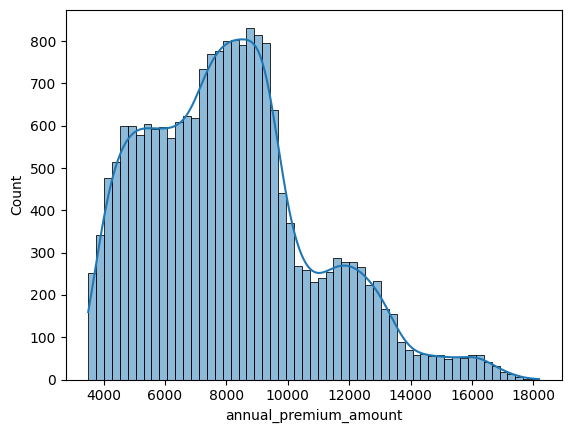

In [52]:
sns.histplot(data=df_young,x='annual_premium_amount',kde=True)

After applying various non-linear models like XGBoost, Polynomial Regression, and Decision Tree, the train and test scores are around 70% and 60% respectively. This suggests the dataset does not have a strong or clear relationship with the target variable. More informative features or additional attributes may be needed—especially  age < 25—to improve model performance.



In [53]:
final_model_rest = model_lr_rest
final_model_young =model_poly



In [55]:
#export the model

import pickle


# Export the models
with open('/workspaces/temp/healthcare_premium_prediction/models/final_model_A95_rest.pkl', 'wb') as f:
    pickle.dump(final_model_rest, f)

with open('/workspaces/temp/healthcare_premium_prediction/models/final_model_A60_young.pkl', 'wb') as f:
    pickle.dump(final_model_young, f)
